In [3]:
# Задача
# 1.Сгенерируйте набор данных для предсказания временных последовательностей.Выполните тренировку RNN
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Генерация синтетических данных
def generate_sine_wave(seq_length=100, num_sequences=1000):
    x = np.linspace(0, 50, seq_length)
    y = np.sin(x) + np.random.normal(0, 0.1, size=(num_sequences, seq_length))  # Добавляем шум
    return y

# Генерируем 1000 последовательностей длиной 100
data = generate_sine_wave(seq_length=100, num_sequences=1000)

# Преобразуем данные в тензор PyTorch
data_tensor = torch.tensor(data, dtype=torch.float32)

#Модель RNN
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Используем последний выход RNN
        return out

# Подготовка данных для обучения
# Делаем данные в формате (batch_size, sequence_length, input_size)
input_data = data_tensor[:, :-1].unsqueeze(-1)  # Все данные, кроме последнего элемента
target_data = data_tensor[:, -1].unsqueeze(-1)  # Только последний элемент в качестве цели

# Разделим на обучающую и тестовую выборки
train_size = int(0.8 * len(data))
train_data, test_data = input_data[:train_size], input_data[train_size:]
train_target, test_target = target_data[:train_size], target_data[train_size:]

# Модель, критерий и оптимизатор
model_rnn = RNNModel(input_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=0.001)

# Обучение модели RNN
epochs = 100
for epoch in range(epochs):
    model_rnn.train()
    optimizer.zero_grad()
    
    output = model_rnn(train_data)
    loss = criterion(output, train_target)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Эпоха {epoch}/{epochs}, Потери: {loss.item()}")

# Оценка модели
model_rnn.eval()
with torch.no_grad():
    predictions = model_rnn(test_data)
    test_loss = criterion(predictions, test_target)
    print(f"Потери при тестировании(RNN): {test_loss.item()}")


Эпоха 0/100, Потери: 0.12796920537948608
Эпоха 10/100, Потери: 0.02381186932325363
Эпоха 20/100, Потери: 0.013744574971497059
Эпоха 30/100, Потери: 0.010257571004331112
Эпоха 40/100, Потери: 0.00992626789957285
Эпоха 50/100, Потери: 0.010007914155721664
Эпоха 60/100, Потери: 0.009979006834328175
Эпоха 70/100, Потери: 0.00994066335260868
Эпоха 80/100, Потери: 0.009922275319695473
Эпоха 90/100, Потери: 0.009915187954902649
Потери при тестировании(RNN): 0.009809439070522785


In [4]:
#Модификация модели с использованием LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Используем последний выход LSTM
        return out

# Модель, критерий и оптимизатор для LSTM
model_lstm = LSTMModel(input_size=1)
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

# Обучение модели LSTM
for epoch in range(epochs):
    model_lstm.train()
    optimizer.zero_grad()
    
    output = model_lstm(train_data)
    loss = criterion(output, train_target)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Эпоха {epoch}/{epochs}, Потери: {loss.item()}")

# Оценка модели
model_lstm.eval()
with torch.no_grad():
    predictions = model_lstm(test_data)
    test_loss = criterion(predictions, test_target)
    print(f"Потери при тестировании(LSTM): {test_loss.item()}")

Эпоха 0/100, Потери: 0.0969259962439537
Эпоха 10/100, Потери: 0.018631352111697197
Эпоха 20/100, Потери: 0.015010305680334568
Эпоха 30/100, Потери: 0.010264583863317966
Эпоха 40/100, Потери: 0.01032157614827156
Эпоха 50/100, Потери: 0.00999441184103489
Эпоха 60/100, Потери: 0.009903663769364357
Эпоха 70/100, Потери: 0.00991889275610447
Эпоха 80/100, Потери: 0.009893043898046017
Эпоха 90/100, Потери: 0.009892287664115429
Потери при тестировании(LSTM): 0.009829645045101643


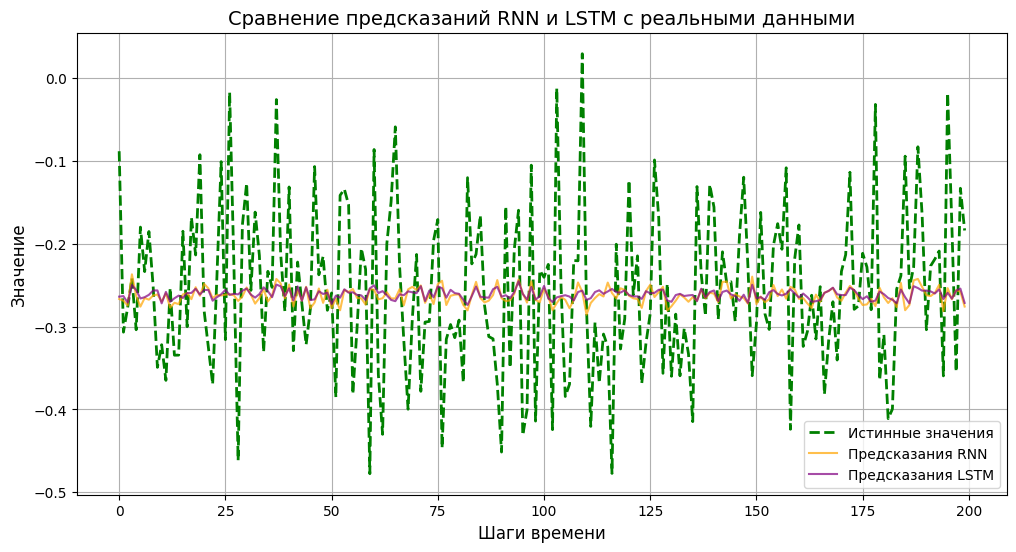

In [5]:
# Импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt

# Установка режима оценки для моделей RNN и LSTM
model_rnn.eval()
with torch.no_grad():
    rnn_predictions = model_rnn(test_data)

model_lstm.eval()
with torch.no_grad():
    lstm_predictions = model_lstm(test_data)

# Преобразование данных для удобства визуализации
rnn_predictions = rnn_predictions.squeeze().tolist()
lstm_predictions = lstm_predictions.squeeze().tolist()
test_target = test_target.squeeze().tolist()

# Визуализация результатов
plt.figure(figsize=(12, 6))
# Истинные значения
plt.plot(test_target, label='Истинные значения', color='green', linestyle='--', linewidth=2)
# Результаты модели RNN
plt.plot(rnn_predictions, label='Предсказания RNN', color='orange', linestyle='-', alpha=0.7)
# Результаты модели LSTM
plt.plot(lstm_predictions, label='Предсказания LSTM', color='purple', linestyle='-', alpha=0.7)

# Оформление графика
plt.title('Сравнение предсказаний RNN и LSTM с реальными данными', fontsize=14)
plt.xlabel('Шаги времени', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()
